<a href="https://colab.research.google.com/github/Sky-rain8848/Hands-On-ML-with-SKT/blob/master/CNN_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Use CNN to Classify Dogs & Cats**

This is a kaggle competation that you'll create an algorithm to distinguish dogs from cats.

In this case, we use a smaller dataset with 2000 training images and 1000 validation images and 1000 test images, each split contains the same number of samples from each class, and you can download the original dataset at [www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats)

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import optimizers

# Model building

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

# Configuring the model for training



In [39]:
model.compile(loss='binary_crossentropy',  
       optimizer='sgd',
       metrics=['acc'])

# Data preprocessing

As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:



1.   Read the picture files
2.   Decode the JPEG content to RGB grids of pixels.
3.   Convert these into floating-point tensors.
4.   Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

<font color="#006666">Keras</font> has a module with image-processing helper tools, located at <font color="#006666">keras.preprocessing.image.</font> 
In particular, it contains the class <font color="#006666">ImageDataGenerator</font>, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.




In [40]:
image_width = 150
image_hight = 150
Batch_Size = 20
Epochs = 50

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255)   # rescales all images by 1/255
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = validation_datagen.flow_from_directory(
    '/content/drive/My Drive/cats_dogs_small/train',       # target directory
    target_size=(image_width, image_hight),            # resizes all images to 150*150
    batch_size=Batch_Size,
    class_mode='binary')                      # because you use binary_crossentropy loss, you need binary labels. 

Found 2000 images belonging to 2 classes.


In [43]:
validation_generator = test_datagen.flow_from_directory(  
     '/content/drive/My Drive/cats_dogs_small/validation',
     target_size=(image_width, image_hight),
     batch_size=Batch_Size,
     class_mode='binary')

Found 1000 images belonging to 2 classes.


In [44]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)        # 150*150 RGB 
  print('labels batch shape:', labels_batch.shape)       
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fit the model to the data using the generator

Fit the model using the <font color="#006666">fit</font> method.\
<font color="#006666">fit(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)</font><br>

<font color="#006666">generator:</font> a Python generator that will yield batches of inputs and targets indefinitely.\
<font color="#006666">steps_per_epoch:</font> Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. 
epoch over.\
<font color="#006666">validation_data:</font> Data on which to evaluate the loss and any model metrics at the end of each epoch.\
<font color="#006666">validation_steps:</font> otal number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

More details see [here](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)


In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,           # how many samples to draw from the generator
    epochs=30,
    validation_data=validation_generator,   # yield batches of validation data 
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 647s 6s/step - loss: 0.6941 - acc: 0.4950 - val_loss: 0.6913 - val_acc: 0.4950
Epoch 2/30
100/100 [==============================] - 105s 1s/step - loss: 0.6914 - acc: 0.5220 - val_loss: 0.6894 - val_acc: 0.5020
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.6900 - acc: 0.5260 - val_loss: 0.6873 - val_acc: 0.5410
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.6888 - acc: 0.5400 - val_loss: 0.6848 - val_acc: 0.5730
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.6864 - acc: 0.5675 - val_loss: 0.6821 - val_acc: 0.5780
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.6841 - acc: 0.5635 - val_loss: 0.6816 - val_acc: 0.5900
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.6805 - acc: 0.5885 - val_loss: 0.6836 - val_acc: 0.5050
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

# Testing

In [47]:
dst_path = '/content/drive/My Drive/cats_dogs_small/test_set'

In [48]:
test_filenames = os.listdir(dst_path)
test_df = pd.DataFrame({
    'id': test_filenames
})

In [49]:
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    dst_path, 
    x_col='id',
    y_col=None,
    class_mode=None,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

Found 1000 validated image filenames.


In [50]:
yhat = model.predict(test_generator)

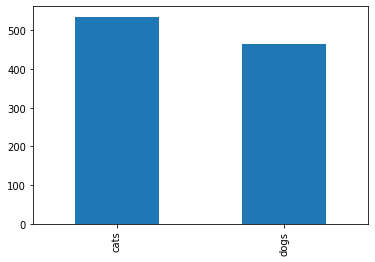

In [52]:
# sigmoid returns probability between 0 and 1, need to convert it to an integer class
yhat = [1 if y > 0.5 else 0 for y in yhat]

test_df['label'] = yhat

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['label'] = test_df['label'].replace(label_map)              # return category cats or dogs

test_df['label'].value_counts().plot.bar()

In [53]:
sample_test = test_df.head(18)
sample_test.head()

,id,label
0,cat.1791.jpg,cats
1,cat.1704.jpg,cats
2,cat.1746.jpg,cats
3,cat.1649.jpg,cats
4,cat.1909.jpg,cats


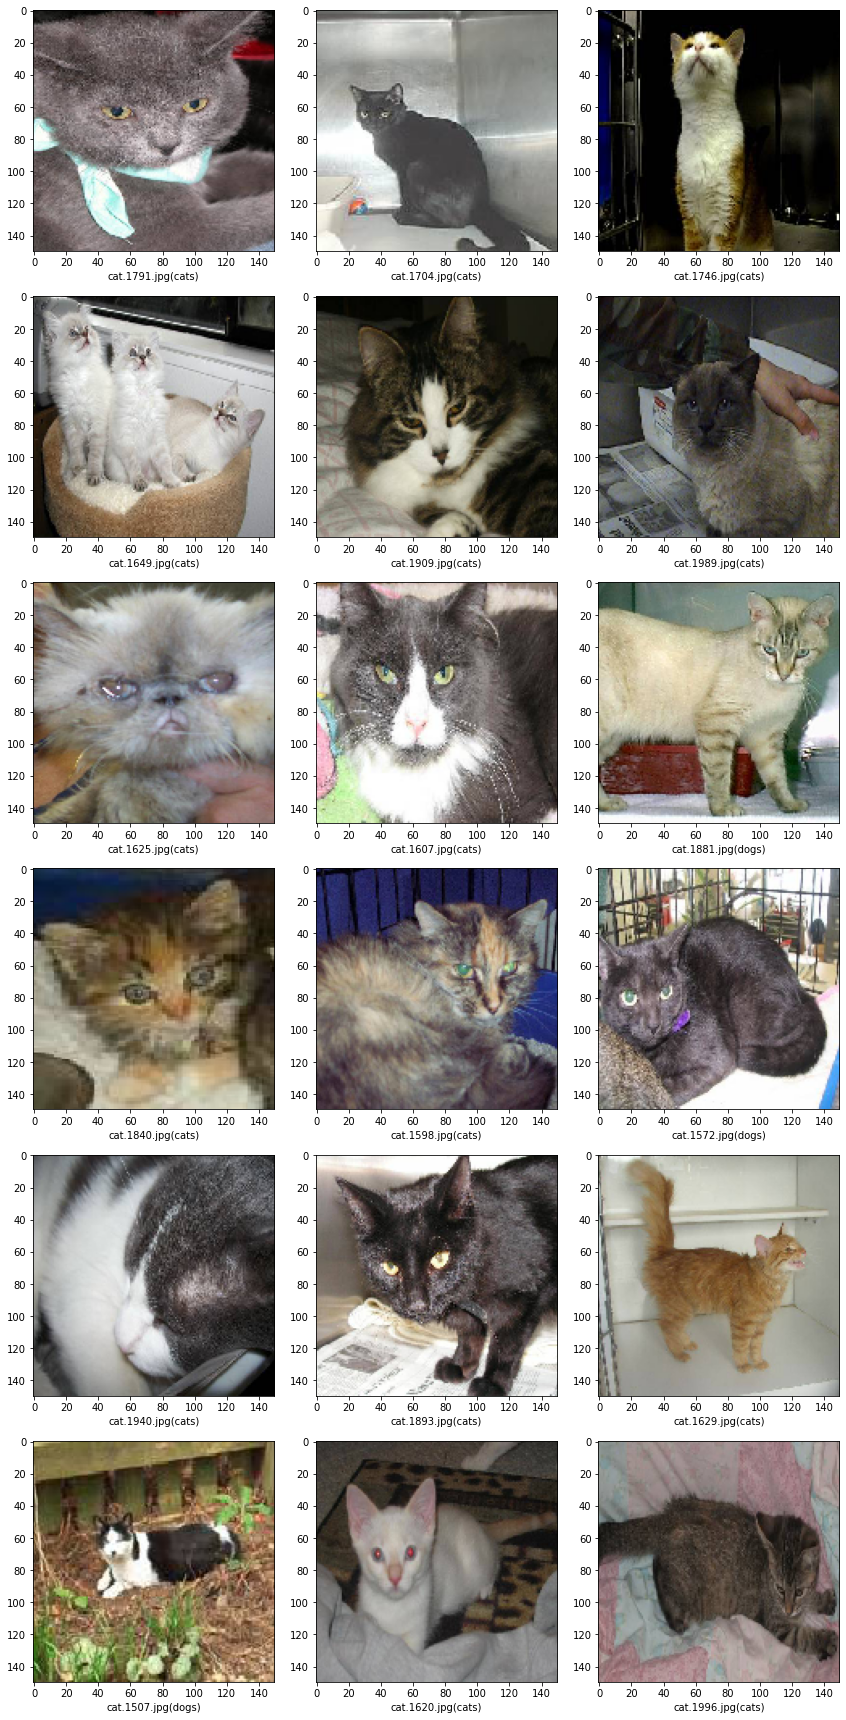

In [56]:
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():     # Iterate over DataFrame rows as (index, Series) pairs.
    filename = row['id']
    category = row['label']
    img = load_img('/content/drive/My Drive/cats_dogs_small/test_set/'+filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()